# **Seminar in Machine Learning - Algorithmic Trading**

#### Submited by:
- Yuval Haski
- Michael Kogan
- Michael Hohashvili
 

<img src="AdobeStock_416057612.jpg" alt="AdobeStock_416057612.jpg" width="800" height="500">


#### *Is it possible to predict the closing price of different periods, using machine learning models with technical indicators?*

## **Table of Content**

1. [Getting the Data](#getting-the-data)
2. [Adding the technical indicators](#adding-the-technical-indicators)
3. [Generating target columns](#generating-target-columns)
4. [Cleaning the data](#cleaning-the-data)
5. [Training and Testing the Data with Regression models](#training-and-testing-the-data-with-regression-models)
6. [First Approach](#first-approach)
7. [Second Approach](#second-approach)
8. [Third Approach](#third-approach)
9. [Chosen Regression Model](#chosen-regression-model)
10. [Overall conclusion about the model performance](#overall-conclusion-about-the-model-performance)


## **Getting the Data**
* Yahoo!Finance API in order to get the Financial historical data

In [ ]:
!pip install --upgrade pip
!pip install yfinance --upgrade --no-cache-dir

In [3]:
import yfinance as yf

In [4]:
sp500 = yf.Ticker('^GSPC')
start_date = '1998-01-01'
end_date = '2023-12-31'

hist = sp500.history(start=start_date, end=end_date)
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1998-01-02 00:00:00-05:00,970.429993,975.039978,965.729980,975.039978,366730000,0.0,0.0
1998-01-05 00:00:00-05:00,975.039978,982.630005,969.000000,977.070007,628070000,0.0,0.0
1998-01-06 00:00:00-05:00,977.070007,977.070007,962.679993,966.580017,618360000,0.0,0.0
1998-01-07 00:00:00-05:00,966.580017,966.580017,952.669983,964.000000,667390000,0.0,0.0
1998-01-08 00:00:00-05:00,964.000000,964.000000,955.039978,956.049988,652140000,0.0,0.0
...,...,...,...,...,...,...,...
2023-12-22 00:00:00-05:00,4753.919922,4772.939941,4736.770020,4754.629883,3046770000,0.0,0.0
2023-12-26 00:00:00-05:00,4758.859863,4784.720215,4758.450195,4774.750000,2513910000,0.0,0.0
2023-12-27 00:00:00-05:00,4773.450195,4785.390137,4768.899902,4781.580078,2748450000,0.0,0.0


### **Visualize the data**
* We will use matplotlib library to help us plot the data 

In [5]:
import matplotlib.pyplot as plt

In [6]:
def showGraph(df, title, color):
    plt.figure(figsize=(20,10))
    plt.plot(df,color)
    plt.title(title)
    plt.grid()
    plt.show()

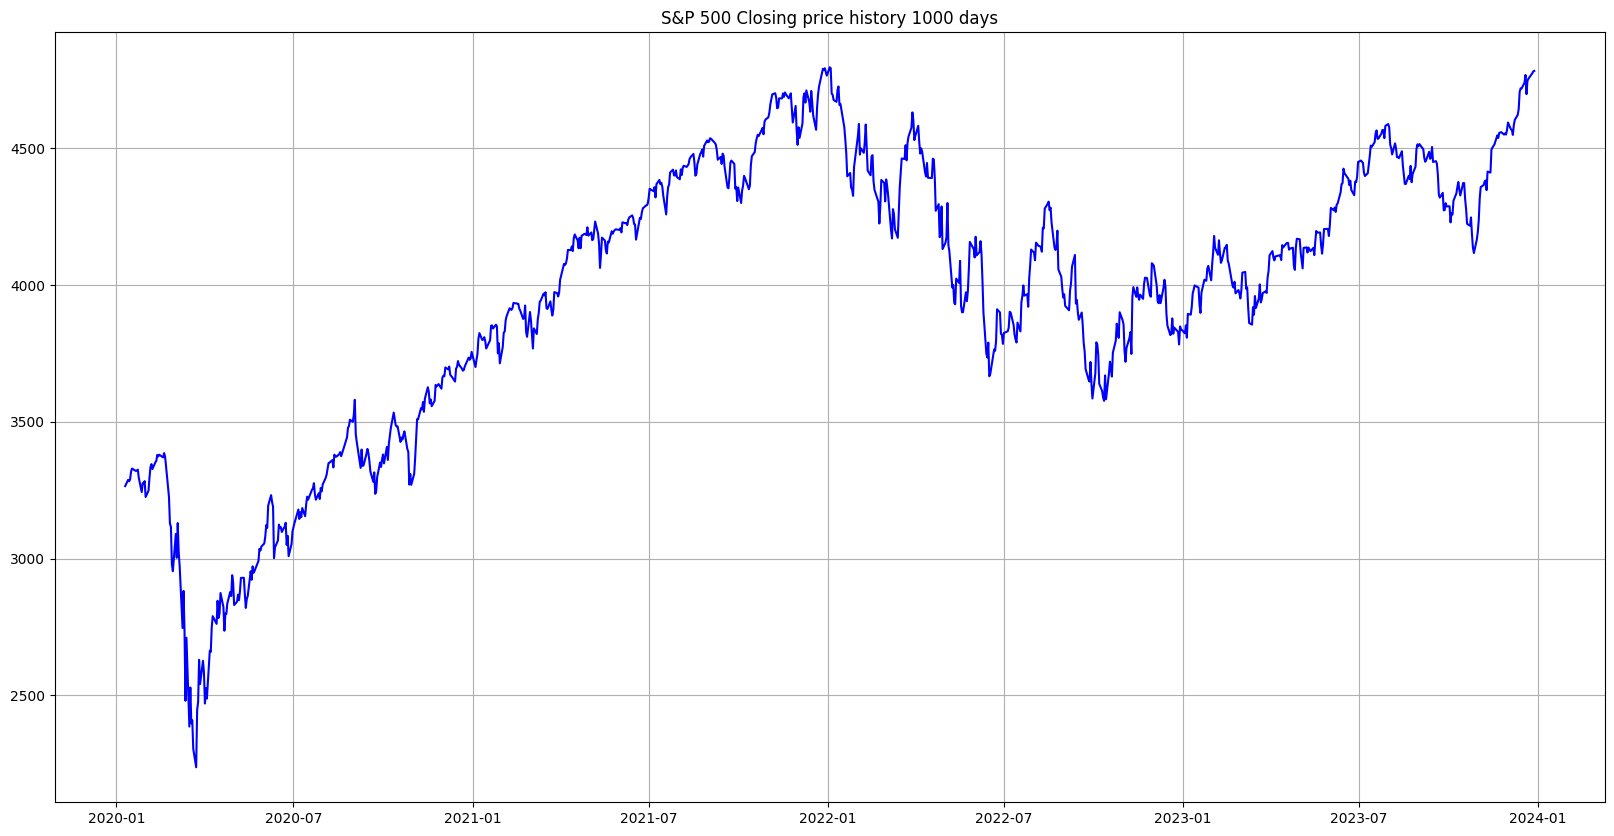

In [7]:
close_gspc = hist["Close"][-1000:-1]
showGraph(close_gspc , "S&P 500 Closing price history 1000 days", 'blue')

## **Adding the technical indicators**
#### We will start by working with:
* CCI
* CMF
* KDJ
* ATR
* WR
* MACD
* RSI
* MFI
* MVP 
#### **For calculating the indicators we will be mainly using pandas_ta library**
##### *The pandas_ta library is an open-source Python library that provides various technical analysis indicators for financial time series data*

In [8]:
!pip install pandas-ta

Defaulting to user installation because normal site-packages is not writeable


In [9]:
import pandas_ta as ta

* CCI (Commodity Channel Index) Indicator
    * a technical indicator that measures the difference between the current price and the historical average price. When the CCI is above zero, it indicates the price is above the historic average. Conversely, when the CCI is below zero, the price is below the historic average

In [10]:
hist.ta.cci(append=True)

Date
1998-01-02 00:00:00-05:00          NaN
1998-01-05 00:00:00-05:00          NaN
1998-01-06 00:00:00-05:00          NaN
1998-01-07 00:00:00-05:00          NaN
1998-01-08 00:00:00-05:00          NaN
                               ...    
2023-12-22 00:00:00-05:00    83.642356
2023-12-26 00:00:00-05:00    92.697021
2023-12-27 00:00:00-05:00    92.573434
2023-12-28 00:00:00-05:00    99.210219
2023-12-29 00:00:00-05:00    72.177300
Name: CCI_14_0.015, Length: 6541, dtype: float64

* CMF (Chaikin Money Flow) Indicator:
    * CMF is a technical indicator used to measure the flow of money into or out of a security over a specified period. It combines price and volume data to assess buying and selling pressure.
    * When the CMF is above zero, it suggests that buying pressure is stronger, indicating accumulation. Conversely, when the CMF is below zero, it suggests that selling pressure is stronger, indicating distribution.
    * CMF values closer to +1 indicate strong buying pressure, while values closer to -1 indicate strong selling pressure.

In [11]:
hist.ta.cmf(append=True)

Date
1998-01-02 00:00:00-05:00         NaN
1998-01-05 00:00:00-05:00         NaN
1998-01-06 00:00:00-05:00         NaN
1998-01-07 00:00:00-05:00         NaN
1998-01-08 00:00:00-05:00         NaN
                               ...   
2023-12-22 00:00:00-05:00    0.325559
2023-12-26 00:00:00-05:00    0.352526
2023-12-27 00:00:00-05:00    0.371550
2023-12-28 00:00:00-05:00    0.403155
2023-12-29 00:00:00-05:00    0.355852
Name: CMF_20, Length: 6541, dtype: float64

* KDJ
    * It is a technical indicator used to analyze and predict changes in stock trends and price patterns in a traded asset.
It is used to identify overbought and oversold conditions in a security's price.

In [12]:
hist.ta.kdj(append=True) # Stochastic KDJ

,K_9_3,D_9_3,J_9_3
Date,,,
1998-01-02 00:00:00-05:00,NaN,NaN,NaN
1998-01-05 00:00:00-05:00,NaN,NaN,NaN
1998-01-06 00:00:00-05:00,NaN,NaN,NaN
1998-01-07 00:00:00-05:00,NaN,NaN,NaN
1998-01-08 00:00:00-05:00,NaN,NaN,NaN
...,...,...,...
2023-12-22 00:00:00-05:00,84.276852,85.734158,81.362241
2023-12-26 00:00:00-05:00,87.169043,86.212453,89.082224
2023-12-27 00:00:00-05:00,90.051174,87.492027,95.169468


* ATR (Average True Range) Indicator:
    * ATR is a volatility indicator used to measure the average range of price movements in a security over a specified period.
    * It calculates the true range, which is the greatest of the following:
        * The difference between the current high and the current low.
        * The absolute value of the difference between the current high and the previous close.
        * The absolute value of the difference between the current low and the previous close.
    * ATR is typically calculated as a simple moving average of the true range values over the specified period.
    * A higher ATR value indicates higher volatility, while a lower ATR value suggests lower volatility.

In [13]:
hist.ta.atr(append=True)

Date
1998-01-02 00:00:00-05:00          NaN
1998-01-05 00:00:00-05:00          NaN
1998-01-06 00:00:00-05:00          NaN
1998-01-07 00:00:00-05:00          NaN
1998-01-08 00:00:00-05:00          NaN
                               ...    
2023-12-22 00:00:00-05:00    41.184150
2023-12-26 00:00:00-05:00    40.391734
2023-12-27 00:00:00-05:00    38.684484
2023-12-28 00:00:00-05:00    36.801294
2023-12-29 00:00:00-05:00    36.775483
Name: ATRr_14, Length: 6541, dtype: float64

* WR (Williams %R - Williams Percent Range)
    * Williams %R compares a stock’s closing price to its high-low range over a specific period (usually 14 days).
    * It assists in finding entry and exit points.
    * Reading Interpretation:
        Above -20: Indicates overbought conditions.
        Below -80: Suggests oversold conditions.
        Overbought or oversold readings don’t guarantee price reversals.

In [14]:
hist.ta.willr(length=14, append=True)

Date
1998-01-02 00:00:00-05:00          NaN
1998-01-05 00:00:00-05:00          NaN
1998-01-06 00:00:00-05:00          NaN
1998-01-07 00:00:00-05:00          NaN
1998-01-08 00:00:00-05:00          NaN
                               ...    
2023-12-22 00:00:00-05:00   -10.098875
2023-12-26 00:00:00-05:00    -4.185293
2023-12-27 00:00:00-05:00    -1.730508
2023-12-28 00:00:00-05:00    -4.538277
2023-12-29 00:00:00-05:00   -11.740166
Name: WILLR_14, Length: 6541, dtype: float64

* MACD (Moving Average Convergence Divergence)
    * MACD is a trend-following momentum indicator used to identify the strength and direction of a security's price trend.
    * Trend-following momentum indicator that shows the relationship between two exponential moving averages (EMAs) of a security’s price
    * Help investors identify price trends, measure trend momentum, and identify market entry points for buying or selling. 

In [15]:
hist.ta.macd(append=True)

,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9
Date,,,
1998-01-02 00:00:00-05:00,NaN,NaN,NaN
1998-01-05 00:00:00-05:00,NaN,NaN,NaN
1998-01-06 00:00:00-05:00,NaN,NaN,NaN
1998-01-07 00:00:00-05:00,NaN,NaN,NaN
1998-01-08 00:00:00-05:00,NaN,NaN,NaN
...,...,...,...
2023-12-22 00:00:00-05:00,77.173143,3.547671,73.625472
2023-12-26 00:00:00-05:00,77.822249,3.357421,74.464827
2023-12-27 00:00:00-05:00,77.988793,2.819173,75.169621


* RSI (Relative Strength Index) Indicator:
    * RSI is a momentum oscillator used to measure the speed and change of price movements in a security.
    * It calculates the ratio of higher closes to lower closes over a specified period, typically 14 days.
    * RSI measures the speed and magnitude of a security's recent price changes to evaluate overvalued or undervalued conditions in the price of that security.

In [16]:
hist.ta.rsi(append=True)

Date
1998-01-02 00:00:00-05:00          NaN
1998-01-05 00:00:00-05:00          NaN
1998-01-06 00:00:00-05:00          NaN
1998-01-07 00:00:00-05:00          NaN
1998-01-08 00:00:00-05:00          NaN
                               ...    
2023-12-22 00:00:00-05:00    71.069402
2023-12-26 00:00:00-05:00    72.704374
2023-12-27 00:00:00-05:00    73.256889
2023-12-28 00:00:00-05:00    73.407118
2023-12-29 00:00:00-05:00    70.164874
Name: RSI_14, Length: 6541, dtype: float64

* MFI (Money Flow Index):
    * Measures money flow into or out of a security.
    * Combines price and volume data.
    * Overbought above 80, oversold below 20.

In [17]:
hist.ta.mfi(append=True)

C:\Users\User\AppData\Local\Temp\ipykernel_1440\2698787185.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[6.13142872e+11 6.12995269e+11 5.75943372e+11 ... 1.19979878e+13
 1.31338074e+13 1.29164110e+13]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  hist.ta.mfi(append=True)
C:\Users\User\AppData\Local\Temp\ipykernel_1440\2698787185.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[5.99052743e+11 6.41417406e+11 6.24987057e+11 ... 3.87645717e+13
 1.98500882e+13 1.49115672e+13]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  hist.ta.mfi(append=True)


Date
1998-01-02 00:00:00-05:00          NaN
1998-01-05 00:00:00-05:00          NaN
1998-01-06 00:00:00-05:00          NaN
1998-01-07 00:00:00-05:00          NaN
1998-01-08 00:00:00-05:00          NaN
                               ...    
2023-12-22 00:00:00-05:00    72.950572
2023-12-26 00:00:00-05:00    72.389940
2023-12-27 00:00:00-05:00    78.779178
2023-12-28 00:00:00-05:00    78.421671
2023-12-29 00:00:00-05:00    72.718681
Name: MFI_14, Length: 6541, dtype: float64

* MVP (Momentum, Volume, Price):
    * Momentum: Measures speed and magnitude of price changes. It helps identify trend strength and potential reversals.
        * Positive momentum: Prices are rising.
        * Negative momentum: Prices are falling.
    * Volume: Represents trading activity (shares or contracts). It is simply the total number of shares or contracts traded.
        * High volume during price movements suggests strong conviction by traders.
        * Low volume during price changes may indicate weak interest.
    * Price: Current market value of a security. It reflects supply and demand dynamics.
        * Rising prices indicate bullish sentiment.
        * Falling prices suggest bearish sentiment.

In [18]:
mom = ta.mom(hist['Close'], length=14) # momentum measured over a 14 day range 
acc_dist = ((hist['Close'] - hist['Low']) - (hist['High'] - hist['Close'])) / (hist['High'] - hist['Low']) * hist['Volume']
acc_dist = acc_dist.cumsum()

mvp = mom + acc_dist
hist['MVP'] = mvp
hist['MVP']

Date
1998-01-02 00:00:00-05:00             NaN
1998-01-05 00:00:00-05:00             NaN
1998-01-06 00:00:00-05:00             NaN
1998-01-07 00:00:00-05:00             NaN
1998-01-08 00:00:00-05:00             NaN
                                 ...     
2023-12-22 00:00:00-05:00    2.077991e+12
2023-12-26 00:00:00-05:00    2.078597e+12
2023-12-27 00:00:00-05:00    2.080075e+12
2023-12-28 00:00:00-05:00    2.078415e+12
2023-12-29 00:00:00-05:00    2.078350e+12
Name: MVP, Length: 6541, dtype: float64

In [19]:
hist.rename(columns={"CCI_14_0.015": "CCI"}, inplace=True)
hist.rename(columns={"CMF_20": "CMF"}, inplace=True)
hist.rename(columns={"K_9_3": "K"}, inplace=True)
hist.rename(columns={"D_9_3": "D"}, inplace=True)
hist.rename(columns={"J_9_3": "J"}, inplace=True)
hist.rename(columns={"ATRr_14": "ATR"}, inplace=True)
hist.rename(columns={"WILLR_14": "WR"}, inplace=True)
hist.rename(columns={"MACD_12_26_9":"MACD"}, inplace=True)
hist.rename(columns={"MACDh_12_26_9":"MACDh"}, inplace=True)
hist.rename(columns={"MACDs_12_26_9":"MACDs"}, inplace=True)
hist.rename(columns={"RSI_14":"RSI"}, inplace=True)
hist.rename(columns={"MFI_14":"MFI"}, inplace=True)
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits,CCI,CMF,K,D,J,ATR,WR,MACD,MACDh,MACDs,RSI,MFI,MVP
Date,,,,,,,,,,,,,,,,,,,,
1998-01-02 00:00:00-05:00,970.429993,975.039978,965.729980,975.039978,366730000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-01-05 00:00:00-05:00,975.039978,982.630005,969.000000,977.070007,628070000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-01-06 00:00:00-05:00,977.070007,977.070007,962.679993,966.580017,618360000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-01-07 00:00:00-05:00,966.580017,966.580017,952.669983,964.000000,667390000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-01-08 00:00:00-05:00,964.000000,964.000000,955.039978,956.049988,652140000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22 00:00:00-05:00,4753.919922,4772.939941,4736.770020,4754.629883,3046770000,0.0,0.0,83.642356,0.325559,84.276852,85.734158,81.362241,41.184150,-10.098875,77.173143,3.547671,73.625472,71.069402,72.950572,2.077991e+12
2023-12-26 00:00:00-05:00,4758.859863,4784.720215,4758.450195,4774.750000,2513910000,0.0,0.0,92.697021,0.352526,87.169043,86.212453,89.082224,40.391734,-4.185293,77.822249,3.357421,74.464827,72.704374,72.389940,2.078597e+12
2023-12-27 00:00:00-05:00,4773.450195,4785.390137,4768.899902,4781.580078,2748450000,0.0,0.0,92.573434,0.371550,90.051174,87.492027,95.169468,38.684484,-1.730508,77.988793,2.819173,75.169621,73.256889,78.779178,2.080075e+12


#### **Remove all-zero columns from Data**

In [20]:
all_zero_columns = hist.columns[hist.eq(0).all()]

all_zero_columns_list = list(all_zero_columns)
all_zero_columns_list

['Dividends', 'Stock Splits']

#### **As we can see the columns in the data that are all-zero are:**
* Dividends
* Stock Splits

In [21]:
hist = hist.drop('Dividends', axis=1)
hist = hist.drop('Stock Splits', axis=1)

In [22]:
# Data after removing all-zero columns
hist

,Open,High,Low,Close,Volume,CCI,CMF,K,D,J,ATR,WR,MACD,MACDh,MACDs,RSI,MFI,MVP
Date,,,,,,,,,,,,,,,,,,
1998-01-02 00:00:00-05:00,970.429993,975.039978,965.729980,975.039978,366730000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-01-05 00:00:00-05:00,975.039978,982.630005,969.000000,977.070007,628070000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-01-06 00:00:00-05:00,977.070007,977.070007,962.679993,966.580017,618360000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-01-07 00:00:00-05:00,966.580017,966.580017,952.669983,964.000000,667390000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-01-08 00:00:00-05:00,964.000000,964.000000,955.039978,956.049988,652140000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22 00:00:00-05:00,4753.919922,4772.939941,4736.770020,4754.629883,3046770000,83.642356,0.325559,84.276852,85.734158,81.362241,41.184150,-10.098875,77.173143,3.547671,73.625472,71.069402,72.950572,2.077991e+12
2023-12-26 00:00:00-05:00,4758.859863,4784.720215,4758.450195,4774.750000,2513910000,92.697021,0.352526,87.169043,86.212453,89.082224,40.391734,-4.185293,77.822249,3.357421,74.464827,72.704374,72.389940,2.078597e+12
2023-12-27 00:00:00-05:00,4773.450195,4785.390137,4768.899902,4781.580078,2748450000,92.573434,0.371550,90.051174,87.492027,95.169468,38.684484,-1.730508,77.988793,2.819173,75.169621,73.256889,78.779178,2.080075e+12


#### **Correlation Heatmap of columns in DataFrame**

In [23]:
import seaborn as sns

In [24]:
def showHeatmap(df, title, x, y, isAnnot):
    corr_matrix = df.corr()
    plt.figure(figsize=(x,y))
    sns.heatmap(corr_matrix, annot=isAnnot, cmap='coolwarm', linewidths=0.5)
    plt.title(title)
    plt.show()

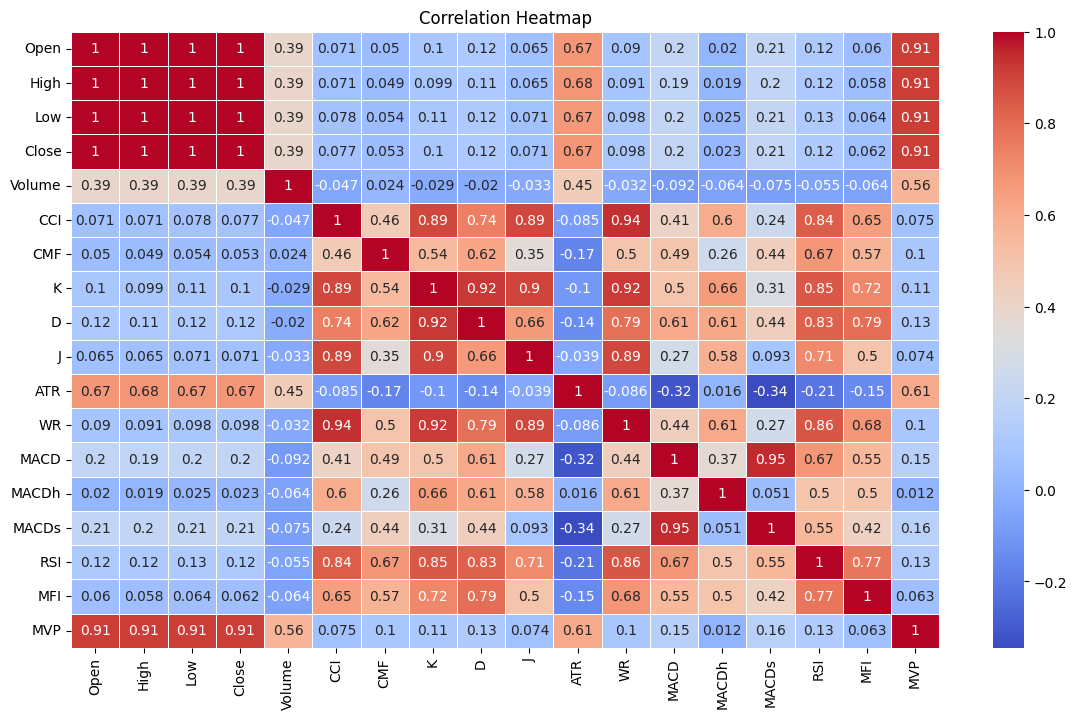

In [25]:
title = 'Correlation Heatmap'
showHeatmap(hist, title, 14, 8, True)

### **Removing unnecessary columns**

* 1. Remove columns which aren't needed from this stage

In [26]:
hist = hist.drop('Open', axis=1)
hist = hist.drop('High', axis=1)
hist = hist.drop('Low', axis=1)

* 2. Remove columns that represent technical indicators which have similar correlation to other indicators and by that they are not adding additional value to the data and to avoid overfitting

In [27]:
hist = hist.drop('CMF', axis=1)
hist = hist.drop('K', axis=1)
hist = hist.drop('D', axis=1)
hist = hist.drop('J', axis=1)
hist = hist.drop('ATR', axis=1)
hist = hist.drop('MACDs', axis=1)
hist = hist.drop('MACDh', axis=1)
hist = hist.drop('RSI', axis=1)
hist = hist.drop('CCI', axis=1)
hist = hist.drop('WR', axis=1)

#### **Correlation Heatmap after removing the unwanted columns from Data**

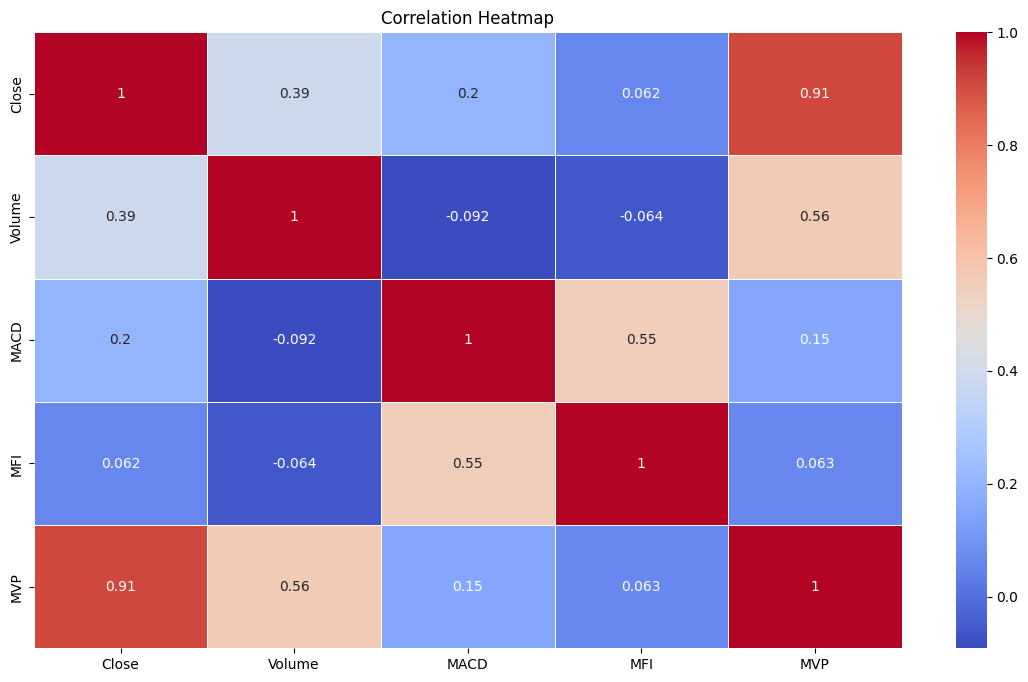

In [28]:
title = 'Correlation Heatmap'
showHeatmap(hist, title, 14, 8, True)

## **Generating target columns**
#### Our goal is to predict tomorrows, next week and next month closing price percentage difference.
#### To do so we will add new columns - next day, week & month closing prices.
#### We'll now add those coulmn and also add a percentage difference column for each newly added column so that we can show the percentage the stock will go up or down for that period of time.

In [29]:
hist["tomorrow"] = hist["Close"].shift(-1)  # Tomorrow column will contain result of shifting all Close values one day back
hist["next_week"] = hist["Close"].shift(-5) # Next week values are 5 days apart because there are 5 trading days a week
hist["next_month"] = hist["Close"].shift(-20) # Next month will contain 20 days: 5(trading days)*4(weaks in month)

#### **Based on this newly added columns we can now calculate percentage difference for each period of time**

In [30]:
# Calculate percentage difference with the closing price for each new column
hist["tomorrow_pct_diff"] = (hist["tomorrow"] - hist["Close"]) / hist["Close"]
hist["next_week_pct_diff"] = (hist["next_week"] - hist["Close"]) / hist["Close"]
hist["next_month_pct_diff"] = (hist["next_month"] - hist["Close"]) / hist["Close"]

#### **Present a Scatter Plot of the Close price with the tomorrow, next_week, next_month Close price value**

In [31]:
def showScatterPlots(df, x_col, y_col, title, x, y):
    plt.figure(figsize=(x, y))
    plt.scatter(df[x_col], df[y_col], alpha=0.6, color='blue')
    plt.title(title)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.grid()
    plt.show()

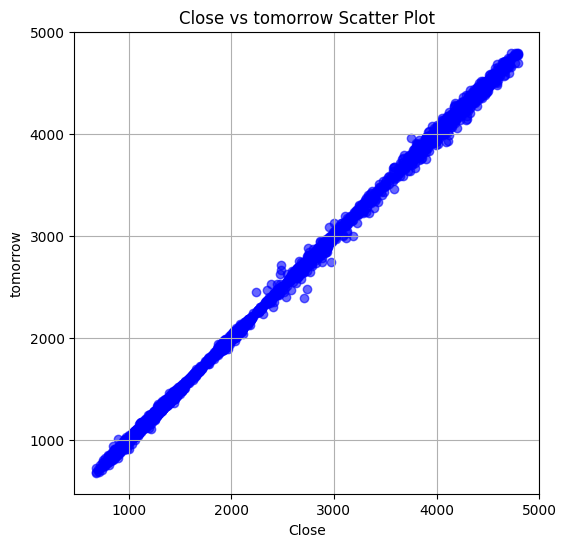

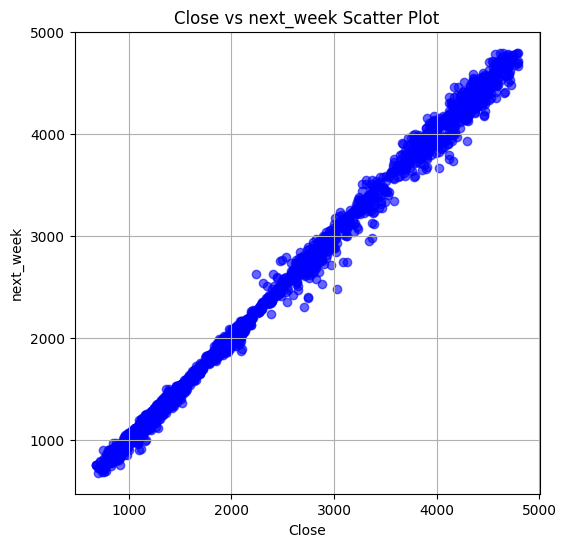

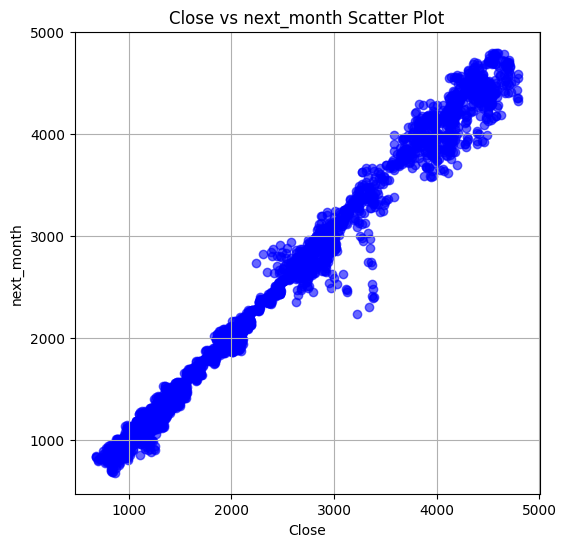

In [32]:
showScatterPlots(hist, 'Close', 'tomorrow', 'Close vs tomorrow Scatter Plot', 6, 6)
showScatterPlots(hist, 'Close', 'next_week', 'Close vs next_week Scatter Plot', 6, 6)
showScatterPlots(hist, 'Close', 'next_month', 'Close vs next_month Scatter Plot', 6, 6)

## **Cleaning the data**
##### Handle missing values (null)
Due to the different time ranges needed for calculation in the indicators and the tomorrow, next_day, next_month columns and their corresponding percentage differnce columns, null values appear in our Data frame.

We will find and remove the rows that contain null values

In [33]:
# Count the number of null values in each column
null_column_counts = hist.isnull().sum(axis=0)
null_column_counts

Close                   0
Volume                  0
MACD                   25
MFI                    13
MVP                    14
tomorrow                1
next_week               5
next_month             20
tomorrow_pct_diff       1
next_week_pct_diff      5
next_month_pct_diff    20
dtype: int64

*In order to know exactly how many rows contain a null value we will execute the last code again but with an axis 1 which represents row and then sum to get the total amount of null rows*

In [34]:
# Count the number of null values in each row
null_row_counts = hist.isnull().sum(axis=1)

# Count the total number of rows with null values
total_rows_with_null = (null_row_counts > 0).sum()

print("Total number of rows with null values:", total_rows_with_null)

Total number of rows with null values: 45


*We got a total of **45** rows which contain null values so we will now remove this lines for our data to be clean*

In [35]:
# Remove rows with null values
hist = hist.dropna()
hist.isna().sum()

Close                  0
Volume                 0
MACD                   0
MFI                    0
MVP                    0
tomorrow               0
next_week              0
next_month             0
tomorrow_pct_diff      0
next_week_pct_diff     0
next_month_pct_diff    0
dtype: int64

## **Training and Testing the Data with Regression models**
##### The mission of the project is to find the most precise closing price for different time ranges so this will be a Regression task because we are looking for a certain price

#### **Test and Train split**
Unlike regular data frames, Time series data cannot be splitted randomly across the dataframe while sampling random rows, as this can be resulted in the model 'cheating' and knowing what will happen in the future.

We will split the data in a way that preserves the temporal order, ensuring that the model is trained on past data and tested on future data.

In [36]:
split_index = int(0.8 * len(hist))

train_data = hist.iloc[:split_index]
test_data = hist.iloc[split_index:]

In [37]:
test_data

,Close,Volume,MACD,MFI,MVP,tomorrow,next_week,next_month,tomorrow_pct_diff,next_week_pct_diff,next_month_pct_diff
Date,,,,,,,,,,,
2018-10-02 00:00:00-04:00,2923.429932,3432620000,14.478805,58.681745,1.528226e+12,2925.510010,2880.340088,2682.629883,0.000712,-0.014739,-0.082369
2018-10-03 00:00:00-04:00,2925.510010,3625510000,14.359919,59.006018,1.526227e+12,2901.610107,2785.679932,2711.739990,-0.008169,-0.047797,-0.073071
2018-10-04 00:00:00-04:00,2901.610107,3510370000,12.196584,52.163918,1.526180e+12,2885.570068,2728.370117,2740.370117,-0.005528,-0.059705,-0.055569
2018-10-05 00:00:00-04:00,2885.570068,3340820000,9.083123,51.779809,1.525535e+12,2884.429932,2767.129883,2723.060059,-0.000395,-0.041046,-0.056318
2018-10-08 00:00:00-04:00,2884.429932,3381820000,6.449340,45.318996,1.527676e+12,2880.340088,2750.790039,2738.310059,-0.001418,-0.046331,-0.050658
...,...,...,...,...,...,...,...,...,...,...,...
2023-11-24 00:00:00-05:00,4559.339844,1639500000,68.011891,77.529628,2.049586e+12,4550.430176,4594.629883,4754.629883,-0.001954,0.007740,0.042833
2023-11-27 00:00:00-05:00,4550.430176,3403990000,68.238422,70.614720,2.048152e+12,4554.890137,4569.779785,4774.750000,0.000980,0.004252,0.049296
2023-11-28 00:00:00-05:00,4554.890137,3586240000,67.994038,70.582534,2.048299e+12,4550.580078,4567.180176,4781.580078,-0.000946,0.002698,0.049768


### **Training the Data**
We are going to demonstrate a couple of different approaches using different regression models and the model which will give the best results will be the chosen model. 
We will start by training the models to predict the next day closing price and evaluate the performance of the model on the test data

* First we will define features and target variables for the train and test sets

In [38]:
X_train = train_data[['Close', 'Volume', 'MACD', 'MFI', 'MVP']]
y_train = train_data['tomorrow']
X_test = test_data[['Close', 'Volume', 'MACD', 'MFI', 'MVP']]
y_test = test_data['tomorrow']

We will Evaluate the model's performance using the performance metrics: 

* MAE (Mean Absolute Error)
* MSE (Mean Squared Error)
* RMSE (Root Mean Squared Error)
* R2 (Coefficient of Determination)

Short explanation about the evaluation metrics we will be using:

* MAE: measures the average magnitude of prediction errors. A lower MAE indicates better performance.
* MSE: penalizes larger errors more heavily. A smaller MSE is desirable.
* RMSE: RMSE measures the average difference between a statistical model’s predicted values and the actual values.A lower RMSE indicates that the model fits the dataset better. It tells us the average error between predicted and actual values.
* R²: assesses how well the model explains variance in the data. R² ranges from 0 to 1 (higher is better).


We will be using sklearn.metrics library. It holds functions for the desired metrics we will be using


In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Function that will help us evaluate the model:


In [40]:
import numpy as np

def evaluation_matrics(y_test, predictions):
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    print("Mean Squared Error (MSE) on test data:", mse)
    print("Root Mean Squared Error (RMSE) on test data:",rmse)
    print("Mean Absolute Error (MAE) on test data:", mae)
    print("R-squared (R2) on test data:", r2)

Function that will calculate the percentage difference between the actual and predicted values


In [41]:
def percentage_difference(predicted, actual):
    return ((predicted - actual) / actual) * 100

Function that will generate a graph that presents the percentage difference between actual and predicted values

In [42]:
def plot_percentage_difference(actual, diff):
    plt.figure(figsize=(20, 10))
    plt.plot(actual.index, diff, label='Percentage Difference', color='green')
    plt.title('Percentage Difference between Actual and Predicted Values')
    plt.xlabel('Date')
    plt.ylabel('Percentage Difference')
    plt.legend()
    plt.grid()
    plt.show()

## ***First Approach:***
This code demonstrates a simple workflow for polynomial regression, where polynomial features are generated from the input features, and a linear regression model is trained on these transformed features to predict target values.

Summary of the steps:

* Polynomial Feature Transformation: It initializes a PolynomialFeatures object with a specified degree (in this case, degree=2) to generate polynomial features from the input features. 
* The fit_transform method transforms the input features (X_train) into polynomial features, and transform is used to transform the test 
features (X_test) accordingly.
* Linear Regression Model Initialization: It initializes a LinearRegression model to fit the polynomial features.
* Model Training: The poly_model is trained on the polynomial features (X_train_poly) along with the corresponding target variable (y_train) using the fit method.
* Making Predictions: The trained model is used to make predictions on the test data (X_test_poly) using the predict method, resulting in poly_test_predictions.
* Evaluation: The performance of the model is evaluated using the chosen evaluation metrics.

##### **First Approach - Training the data:**


In [43]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Initialize a PolynomialFeatures object with the desired degree
poly_features = PolynomialFeatures(degree=2)

# Transform the input features to polynomial features
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Initialize a Linear Regression model
poly_model = LinearRegression()

# Fit the model on the polynomial features
poly_model.fit(X_train_poly, y_train)

LinearRegression()

##### **First Approach - Make predictions on the test data:**

In [44]:
poly_test_predictions = poly_model.predict(X_test_poly)

##### **First Approach - Evaluate the predictions:**

In [45]:
evaluation_matrics(y_test, poly_test_predictions)

Mean Squared Error (MSE) on test data: 276517.06978234794
Root Mean Squared Error (RMSE) on test data: 525.8489039470825
Mean Absolute Error (MAE) on test data: 388.19468925465446
R-squared (R2) on test data: 0.35036643500186504


#### **First Approach - Calculating the percentage difference and plotting the result in a graph:**

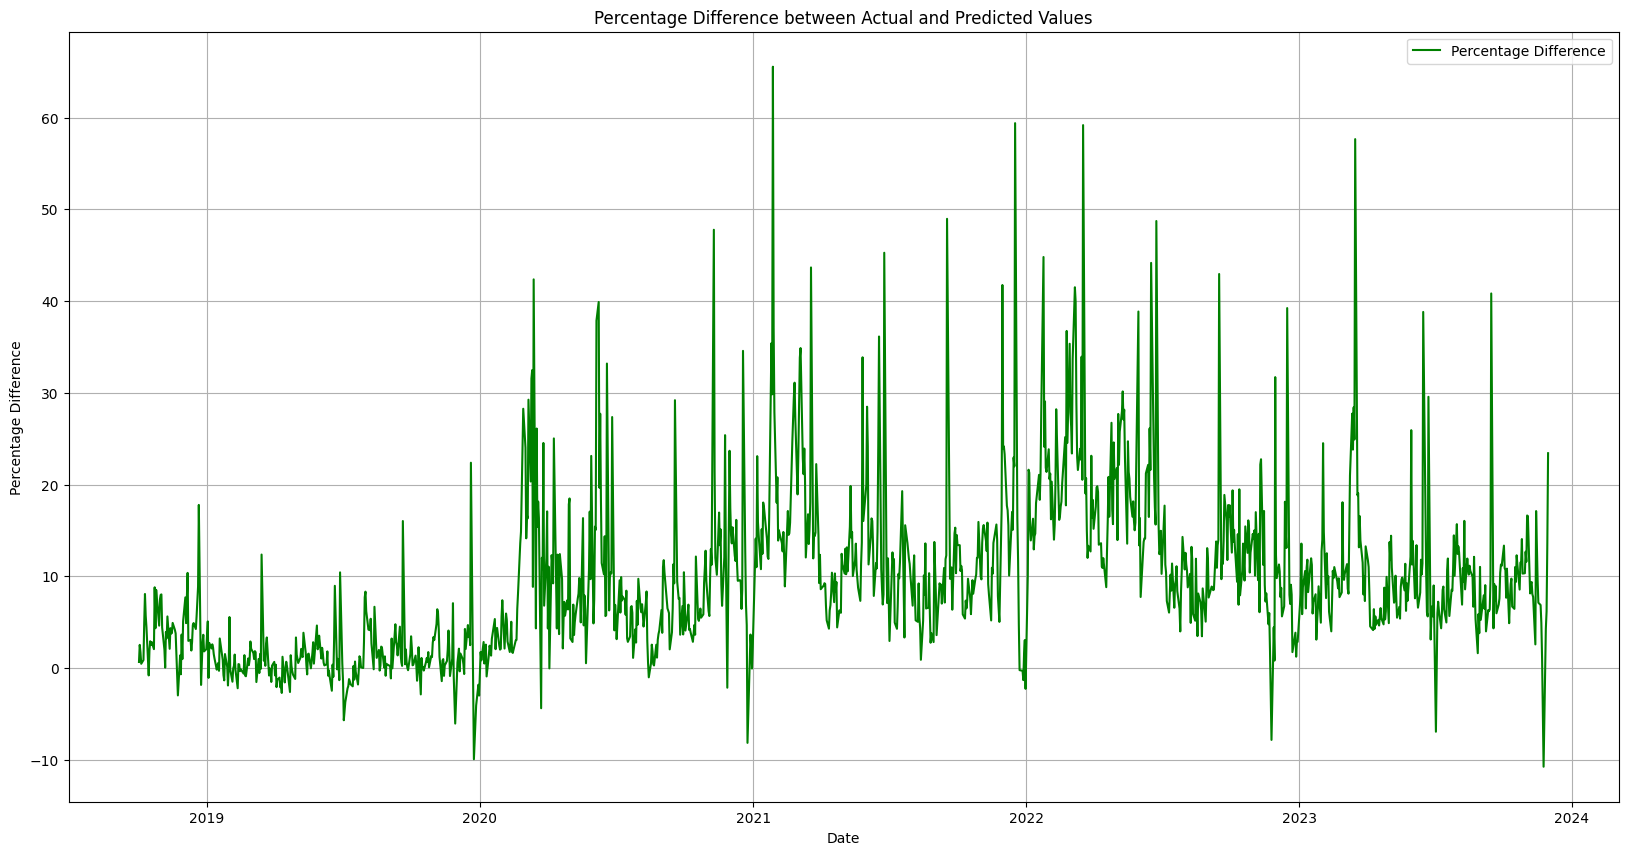

In [46]:
perc_diff = percentage_difference(poly_test_predictions, y_test)

plot_percentage_difference(y_test, perc_diff)

#### **Analyzing the Results:**
The results of our first model suggest that while it may have some predictive capability, it's not capturing the underlying patterns in the data as accurately as desired.

Possible Reasons for results:
* Underfitting: The model may be too simplistic to capture the complexities of the stock price movements. Underfitting occurs when the model is too simple to capture the underlying structure of the data, leading to poor predictive performance.
* Limited Feature Engineering: The model relies solely on polynomial transformations of the input features. It may not capture all relevant factors influencing stock prices, such as market sentiment, economic indicators, or industry trends.


## ***Second Approach:***
This code implements a time-series forecasting approach using lagged features and Linear Regression.

Summary of the steps:

* Creating Lagged Features: The function create_lagged_features creates lagged features from the original dataset by shifting the 'Close', 'Volume', 'MACD', 'MFI', and 'MVP' columns by a specified number of lags (in this case, num_lags = 5).
* Data Preparation: Lagged features are created for both the training and test datasets (train_data_lagged and test_data_lagged), and rows with NaN values resulting from shifting are dropped.
* Defining Features and Target Variables: Features (lagged variables) and target variables are defined for both the training and test sets (X_train_lagged, y_train_lagged, X_test_lagged, y_test_lagged).
* Model Training: A Linear Regression model (lr_model) is initialized and trained on the lagged features and target variables using the fit method.
* Making Predictions: The trained model is used to make predictions on the test data (X_test_lagged) using the predict method, resulting in lr_test_predictions.
* Evaluation: The performance of the model is evaluated using evaluation metrics.


##### **Second Approach - Training the data:**


In [47]:
num_lags = 5

# Function to create lagged features
def create_lagged_features(data, lag):
    lagged_data = data.copy()
    for i in range(1, lag + 1):
        lagged_data[f'Close_lag_{i}'] = lagged_data['Close'].shift(i)
        lagged_data[f'Volume_lag_{i}'] = lagged_data['Volume'].shift(i)
        lagged_data[f'MACD_lag_{i}'] = lagged_data['MACD'].shift(i)
        lagged_data[f'MFI_lag_{i}'] = lagged_data['MFI'].shift(i)
        lagged_data[f'MVP_lag_{i}'] = lagged_data['MVP'].shift(i)
    return lagged_data

In [48]:
# Create lagged features for train and test data
train_data_lagged = create_lagged_features(train_data, num_lags)
test_data_lagged = create_lagged_features(test_data, num_lags)

# Drop rows with NaN values due to shifting
train_data_lagged.dropna(inplace=True)
test_data_lagged.dropna(inplace=True)

# Define features and target variables for the train and test sets
X_train_lagged = train_data_lagged.drop(columns=['tomorrow', 'next_week', 'next_month', 'tomorrow_pct_diff', 'next_week_pct_diff', 'next_month_pct_diff'])
y_train_lagged = train_data_lagged['tomorrow']
X_test_lagged = test_data_lagged.drop(columns=['tomorrow', 'next_week', 'next_month', 'tomorrow_pct_diff', 'next_week_pct_diff', 'next_month_pct_diff'])
y_test_lagged = test_data_lagged['tomorrow']

# Initialize a Linear Regression model
lr_model = LinearRegression()

# Fit the model on the training data
lr_model.fit(X_train_lagged, y_train_lagged)

LinearRegression()

##### **Second Approach - Make predictions on the test data:**

In [49]:
# Make predictions on the test data
lr_test_predictions = lr_model.predict(X_test_lagged)

##### **Second Approach - Evaluate the predictions:**

In [50]:
# Evaluate the model
evaluation_matrics(y_test_lagged, lr_test_predictions)

Mean Squared Error (MSE) on test data: 2114.906587433754
Root Mean Squared Error (RMSE) on test data: 45.9881135450646
Mean Absolute Error (MAE) on test data: 32.4577452417868
R-squared (R2) on test data: 0.995021789971261


#### **Second Approach - Calculating the percentage difference and plotting the result in a graph:**

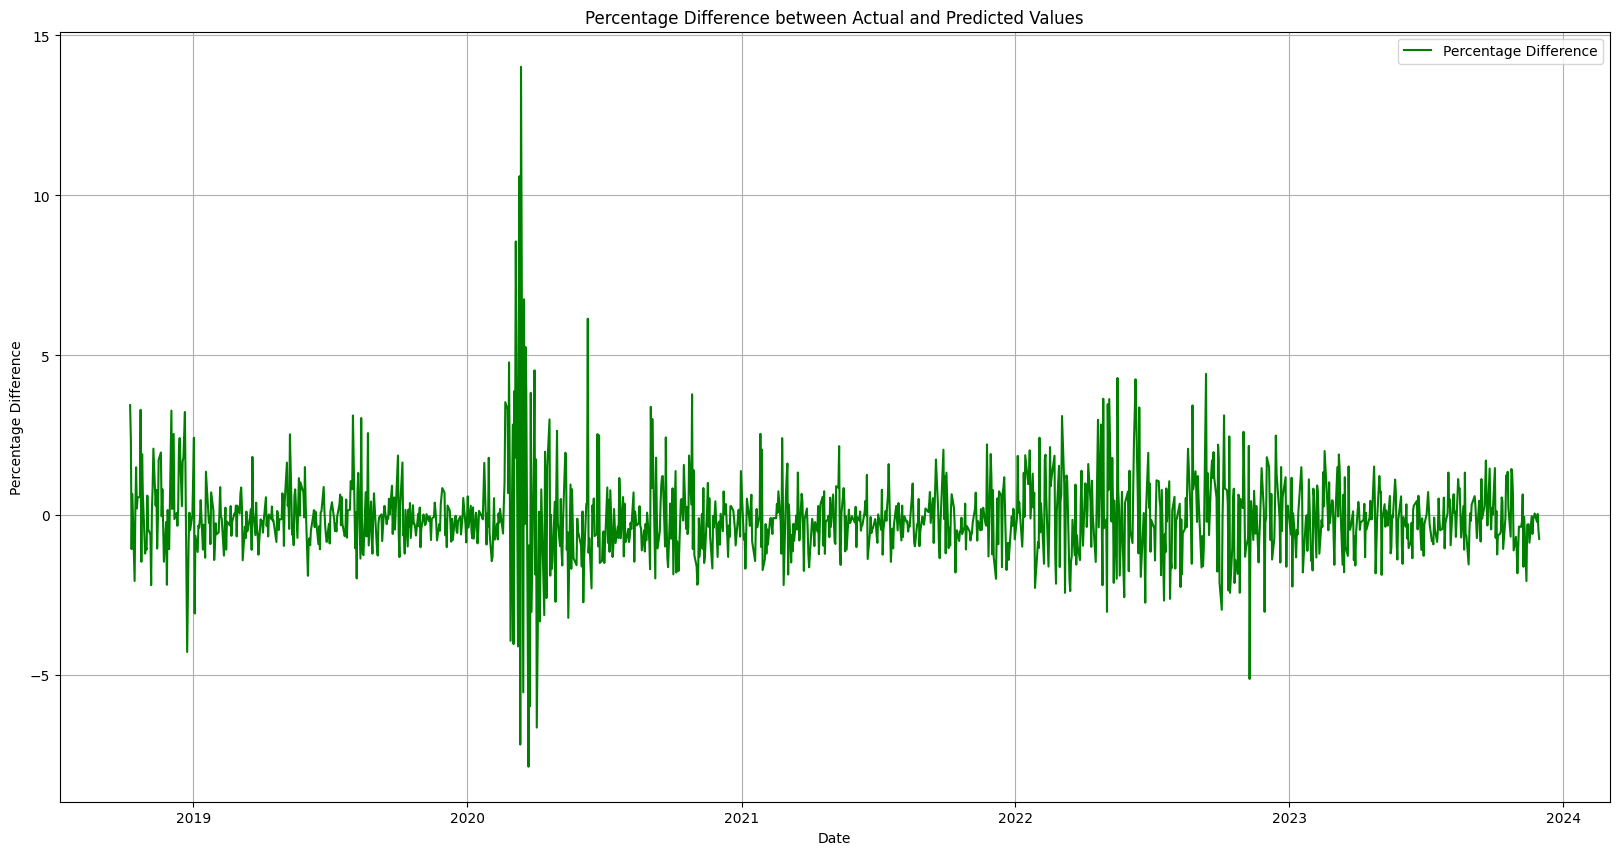

In [51]:
import pandas as pd

# Convert lr_test_predictions to a Pandas Series with the same index as y_test_lagged
lr_test_predictions_series = pd.Series(lr_test_predictions, index=y_test_lagged.index)

perc_diff = percentage_difference(lr_test_predictions_series, y_test_lagged)

plot_percentage_difference(y_test_lagged, perc_diff)

#### **Analyzing the Results:**
The results from the second approach, using lagged features and a linear regression model, show significant improvement compared to the previous approach that utilized polynomial features. 

Possible Reasons for results:
* Feature Engineering: The second approach incorporates lagged features derived from historical data, capturing temporal relationships between the target variable (closing price) and other relevant features (e.g., volume, MACD, MFI, MVP). This allows the model to leverage the sequential nature of the data, leading to more effective predictions.
* Model Selection: Utilizing a simple linear regression model with lagged features reduces the complexity of the model compared to polynomial regression. Linear regression is well-suited for capturing linear relationships between features and the target variable, making it a better choice for this task.
## ***Third Approach:***
This code demonstrates a simple workflow for Lasso Regression, where a Lasso Regression model is initialized, trained on the training data, and then used to make predictions on the test data.

Summary of the steps:

* Lasso Regression Model Initialization: It initializes a Lasso Regression model with a specified alpha value (in this case, alpha=1.0).
* Model Training: The lasso_model is trained on the training data (X_train, y_train) using the fit method.
* Making Predictions: The trained model is used to make predictions on the test data (X_test) using the predict method, resulting in lasso_test_predictions.
* Evaluation: The model's performance is evaluated using evaluation metrics such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and possibly R-squared (R2) using the evaluation_matrics function.

##### **Third Approach - Training the data:**

In [52]:
from sklearn.linear_model import Lasso

# Initialize a Lasso Regression model
lasso_model = Lasso(alpha=1.0)

# Fit the model on the training data
lasso_model.fit(X_train, y_train)

Lasso()

##### **Third Approach - Make predictions on the test data:**

In [53]:
# Make predictions on the test data
lasso_test_predictions = lasso_model.predict(X_test)

##### **Third Approach - Evaluate the predictions:**


In [54]:
# Evaluate the model
evaluation_matrics(y_test, lasso_test_predictions)

Mean Squared Error (MSE) on test data: 2091.6059849149906
Root Mean Squared Error (RMSE) on test data: 45.7340790321068
Mean Absolute Error (MAE) on test data: 32.12066239925099
R-squared (R2) on test data: 0.9950860991922803


#### **Third Approach - Calculating the percentage difference and plotting the result in a graph:**

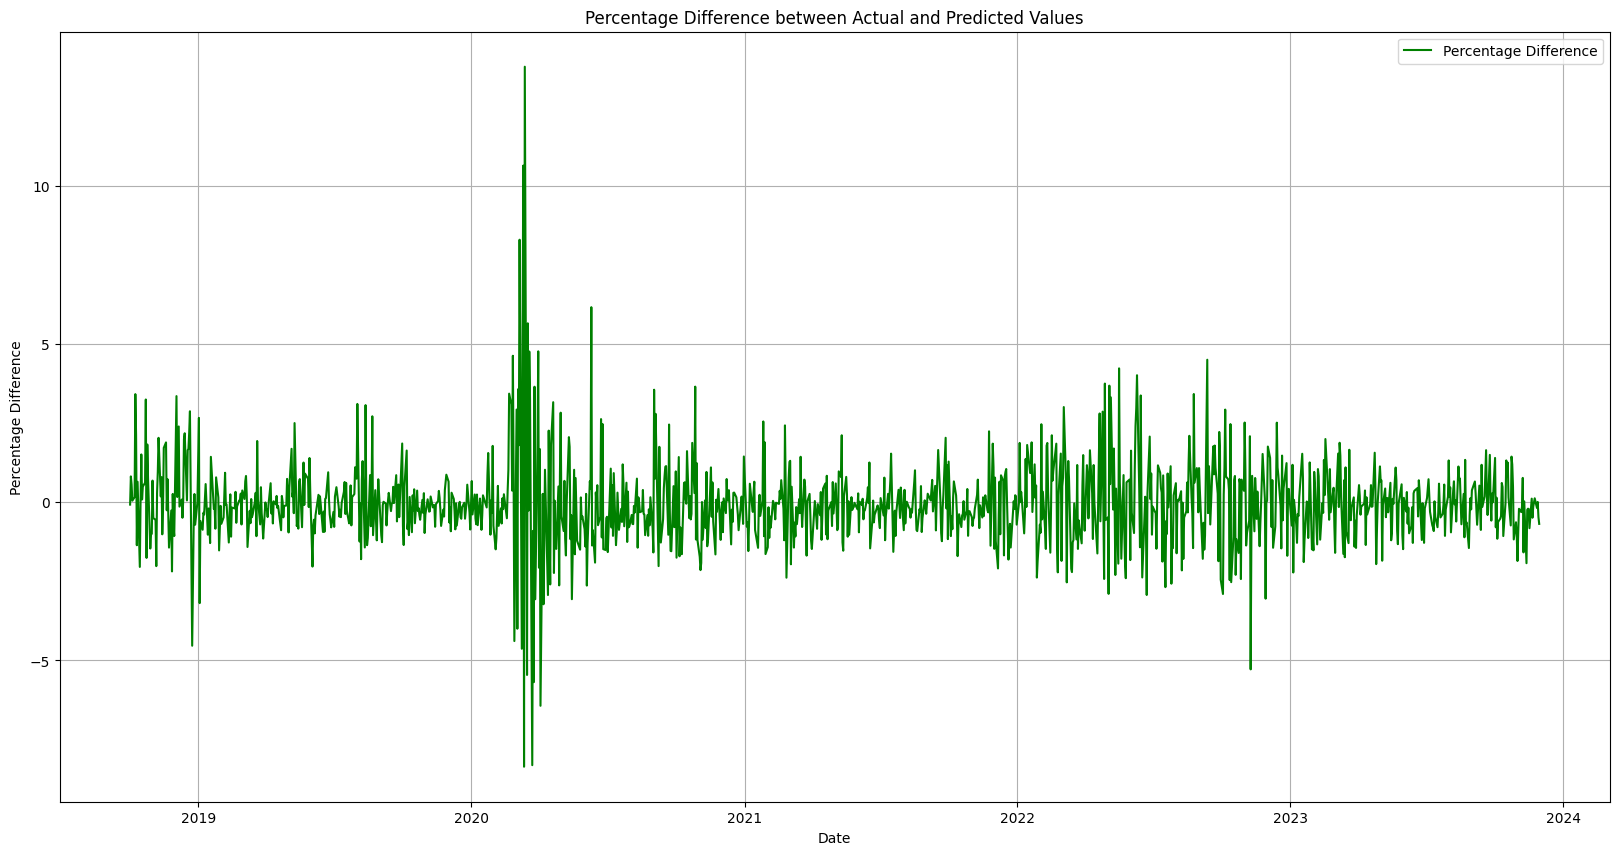

In [55]:
perc_diff = percentage_difference(lasso_test_predictions, y_test)

plot_percentage_difference(y_test, perc_diff)

#### **Analyzing the Results:**

As you can see there was a slight improvement in performance observed in the Lasso regression model compared to the previous approach due to the regularization technique employed by Lasso.

Explanation: 
Regularization Effect: Lasso regression applies L1 regularization, which penalizes the absolute values of the coefficients. This encourages sparsity in the model by driving some coefficients to zero, effectively performing feature selection. In scenarios where there are redundant or irrelevant features, Lasso can improve model performance by eliminating them from consideration, leading to a simpler and more interpretable model.  

### **Chosen Regression Model:**

After trying out a couple of different models and analyzing thier results we have come to the conclusion that the
***Lasso Regression model*** is the best fit for our task. 

We will now use this model to predict the closing price of the next week closing price and the next month closing price like we have done for the tomorrrow closing price.

### *Adding the new target - next_week*

In [56]:
y_train_week = train_data['next_week']
y_test_week = test_data['next_week']

### *Training the data and predicting on the test data for next_week*

In [57]:
# Initialize a Lasso Regression model
lasso_model_week = Lasso(alpha=1.0)

# Fit the model on the training data
lasso_model_week.fit(X_train, y_train_week)

# Make predictions on the test data
lasso_test_predictions_week = lasso_model_week.predict(X_test)

### *Evaluation of the model for next_week predictons*

In [58]:
# Evaluate the model
evaluation_matrics(y_test_week, lasso_test_predictions_week)

Mean Squared Error (MSE) on test data: 9210.620471940852
Root Mean Squared Error (RMSE) on test data: 95.97197753480363
Mean Absolute Error (MAE) on test data: 71.29741896016156
R-squared (R2) on test data: 0.9783813173254876


### *Ploting the percentage difference for next_week*

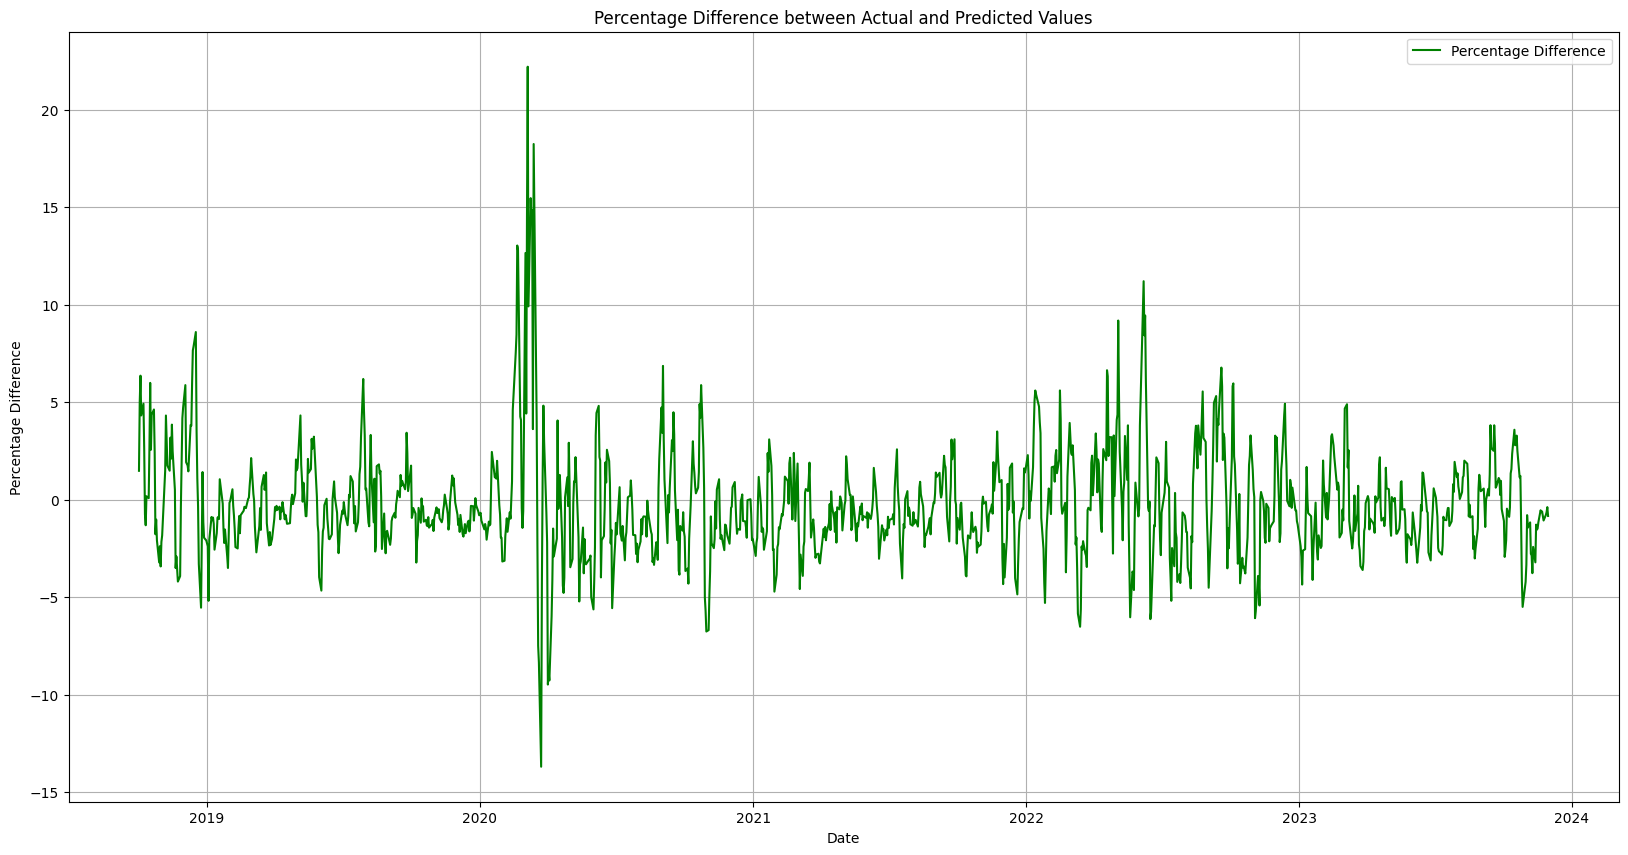

In [59]:
perc_diff = percentage_difference(lasso_test_predictions_week, y_test_week)

plot_percentage_difference(y_test_week, perc_diff)

### *Adding the new target - next_month*

In [60]:
y_train_month = train_data['next_month']
y_test_month = test_data['next_month']

### *Training the data and predicting on the test data for next_month*

In [61]:
# Initialize a Lasso Regression model
lasso_model_month = Lasso(alpha=1.0)

# Fit the model on the training data
lasso_model_month.fit(X_train, y_train_month)

# Make predictions on the test data
lasso_test_predictions_month = lasso_model_month.predict(X_test)

### *Evaluation of the model for next_month predictons*

In [62]:
# Evaluate the model
evaluation_matrics(y_test_month, lasso_test_predictions_month)

Mean Squared Error (MSE) on test data: 37176.65019133924
Root Mean Squared Error (RMSE) on test data: 192.81247415906276
Mean Absolute Error (MAE) on test data: 152.30417211120988
R-squared (R2) on test data: 0.9129866544182473


### *Ploting the percentage difference for next_month*

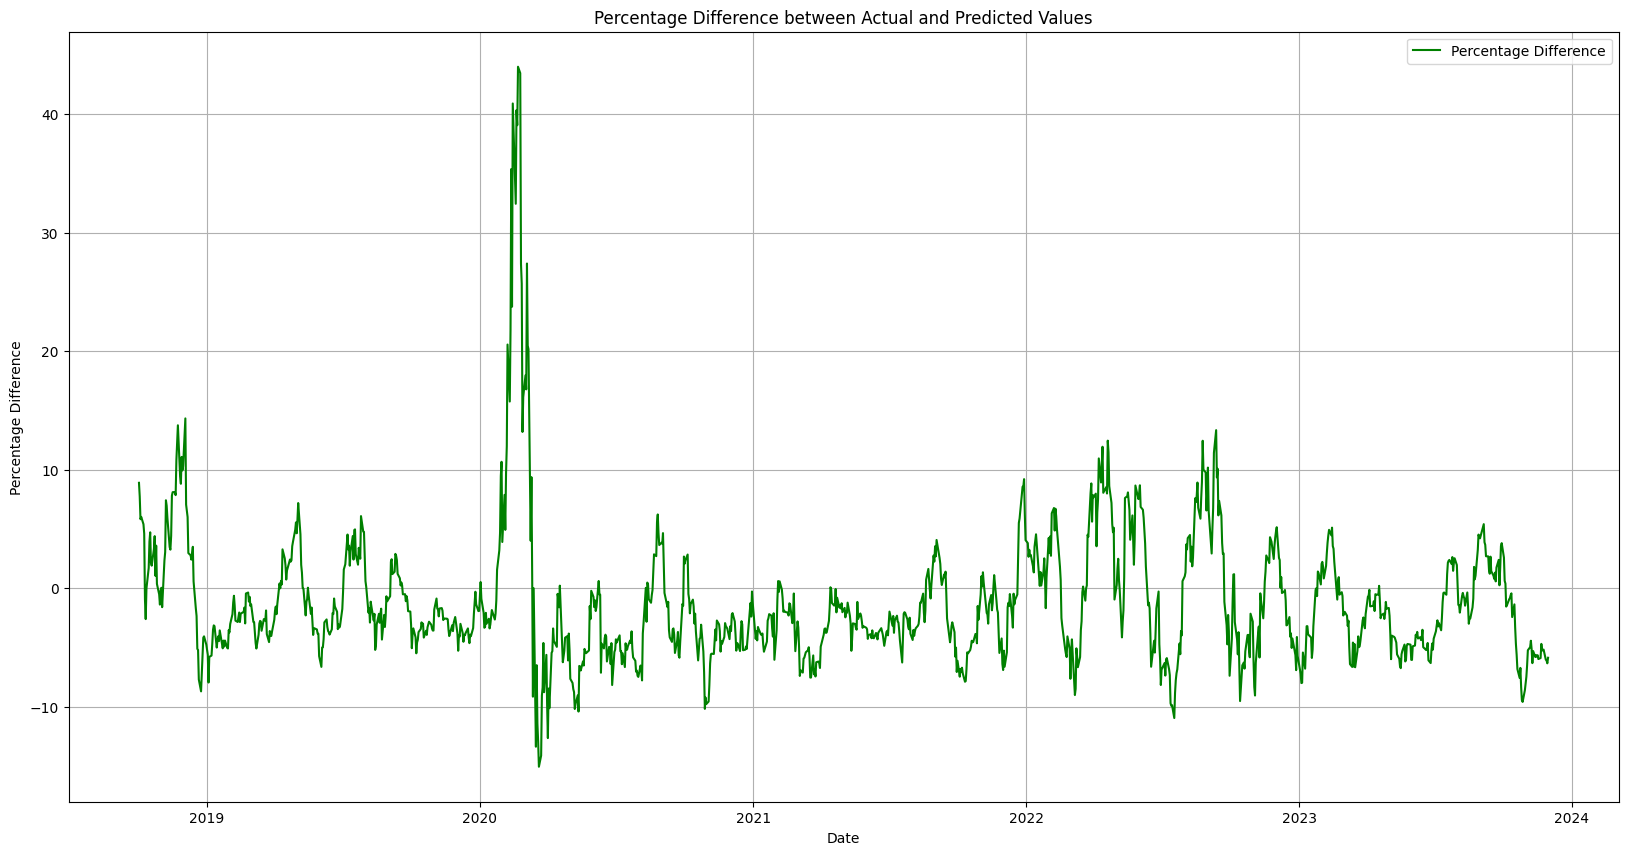

In [63]:
perc_diff = percentage_difference(lasso_test_predictions_month, y_test_month)

plot_percentage_difference(y_test_month, perc_diff)

### **Overall conclusion about the model performance**

In conclusion, while the model demonstrates strong predictive performance overall, particularly for short-term predictions, addressing the challenges posed by unexpected events like the COVID-19 pandemic and improving the model's adaptability and robustness will make the results more accurate and reliable.

Model Performance Summary:
The model demonstrates strong predictive capabilities for short-term (tomorrow) stock price predictions, as indicated by a high R-squared value (0.995). However, its performance gradually deteriorates for longer-term predictions (next week and next month), with increasing errors (MSE, RMSE, and MAE). The spike in percentage difference around 2020 aligns with the COVID-19 pandemic, suggesting that the model struggled during this anomaly.

Strengths:
* Trend Capture: The model generally captures the overall trends in the S&P 500 index.
* Adaptability: It adjusts predictions at different time intervals (daily, weekly, and monthly).

Weaknesses:
* Overfitting: The model may be overfitting to historical data, resulting in excellent short-term predictions but poor generalization.
Overfitting occurs when the model captures noise or specific patterns unique to the training data.
* Lack of External Factors: The model might not account for external shocks (e.g., pandemics, economic changes) that impact stock movements.
Incorporating relevant features (e.g., global economic indicators, sentiment analysis) could improve robustness.
* Long-Term Predictions: The model struggles with long-term predictions (next week and next month), likely due to complex market dynamics and evolving trends.

Potential Improvements:
* Feature Engineering: Including additional features related to market sentiment, economic indicators, and news sentiment.
* Long Short-Term Memory (LSTM) Networks: For time series data, LSTM networks, which can capture long-term dependencies can improve the results.
LSTMs are well-suited for stock price prediction due to their memory cell structure.
